<a href="https://colab.research.google.com/github/mehrshad98/UrbanFloodPredictor/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
In this assignment, you will explore and develop a machine learning model to predict loan approvals.
Using a dataset with socio-demographic and financial data, your goal is to analyze and understand the factors that influence loan approval and build a predictive model based on these insights.

##Project Steps Loan Approval Prediction
1. **Dataset Loading:** Begin by loading the dataset, which includes various features that may impact loan approval outcomes.

2. **Exploratory Data Analysis (EDA):** Analyze patterns and correlations within the data, considering factors like gender marital status, education level, dependents, and income. Summarize
these findings to reveal any initial insights about loan approval likelihood.

3. **Handling Missing Data:** Check for any missing values and apply techniques to handle these gaps, ensuring the dataset is ready for modeling.

4. **Data Encoding and Scaling:** Convert categorical data to numeric form through encoding, and normalize the feature values using MinMax scaling to improve model performance.

5. **Data Splitting:** Split the dataset into training and testing subsets to evaluate model accuracy.

6. **Model Training:** Train several machine learning models, including Logistic Regression, SVM (Support Vector Machine), Decision Tree, Random Forest, Naive Bayes, and K-Nearest
Neighbors (KNN).

7. **Model Evaluation:** Measure the performance of each model using appropriate metrics, such
as accuracy, precision, recall, or F1 score, to assess their effectiveness.

8. **Final Analysis and Model Selection:** Identify the best-performing model (in this case….),
summarize your findings, and save the selected model.

###Objective
By completing this assignment, you will gain practical experience in data preprocessing, model training, and performance evaluation. You will also learn how to interpret the impact of different factors on loan approval and select the most accurate machine learning model for this purpose.

##Dataset Loading
First, we need to load the dataset using pandas.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dataset.csv')

# Display the first few rows
print(data.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

##Exploratory Data Analysis (EDA)
Next, we need to explore the data to understand the patterns and relationships.

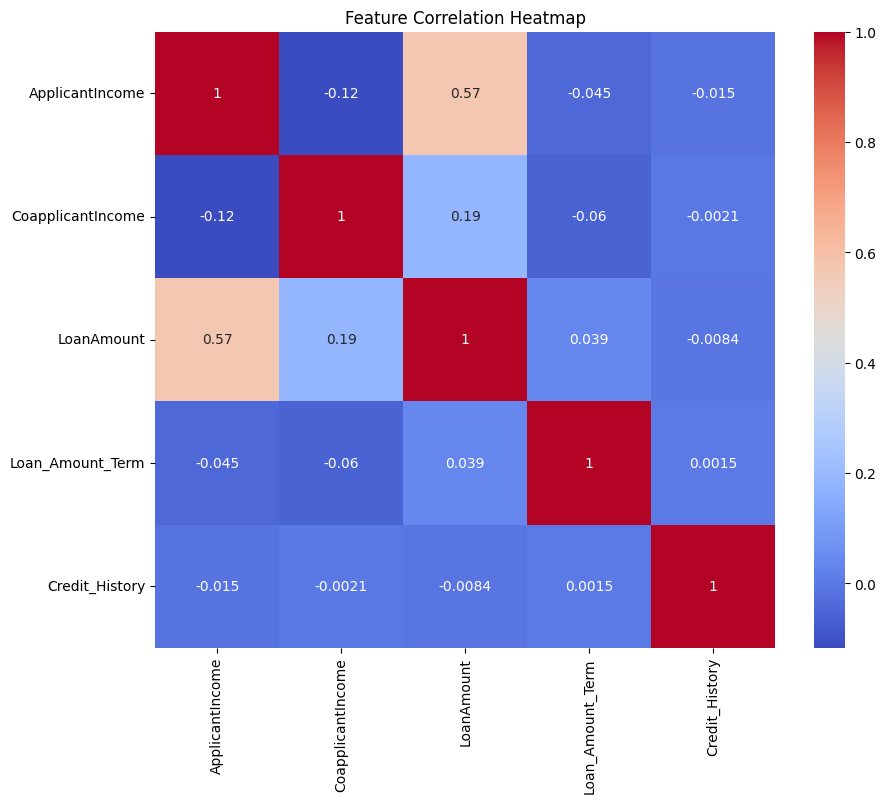

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop 'Loan_ID' since it's just an identifier and not relevant to correlation analysis
data = data.drop(['Loan_ID'], axis=1)

# Generate the correlation heatmap with only numeric features
numeric_data = data.select_dtypes(include=['int64', 'float64'])  # Select only numeric columns

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


###Handling Missing Data
Identify missing values and decide how to handle them—either by dropping or imputing.

python
Copy code


In [5]:
# Handling missing values for numeric columns by filling with the median
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    data[column].fillna(data[column].median(), inplace=True)

# Handling missing values for categorical columns by filling with the mode
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check again to ensure there are no missing values
print(data.isnull().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-5-76e21553146b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-5-76e21553146b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Data Encoding and Scaling
Categorical data needs to be encoded, and numerical features should be normalized.

##Data Encoding and Scaling
Categorical data needs to be encoded, and numerical features should be normalized.


In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encoding categorical variables
labelencoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = labelencoder.fit_transform(data[column])

# Scaling the data
scaler = MinMaxScaler()
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

print(data.head())


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0    0.000000        0.0            0.0         0.070489   
1     1.0      1.0    0.333333        0.0            0.0         0.054830   
2     1.0      1.0    0.000000        0.0            1.0         0.035250   
3     1.0      1.0    0.000000        1.0            0.0         0.030093   
4     1.0      0.0    0.000000        0.0            0.0         0.072356   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.000000    0.172214           0.74359             1.0   
1           0.036192    0.172214           0.74359             1.0   
2           0.000000    0.082489           0.74359             1.0   
3           0.056592    0.160637           0.74359             1.0   
4           0.000000    0.191027           0.74359             1.0   

   Property_Area  Loan_Status  
0            1.0          1.0  
1            0.0          0.0  
2            1.0    

## Data Splitting
Split the data into training and testing sets.


In [7]:
from sklearn.model_selection import train_test_split

# Assuming 'Loan_Status' is the target column
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Model Training
Train multiple machine learning models.



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} model trained.')


Logistic Regression model trained.
SVM model trained.
Decision Tree model trained.
Random Forest model trained.
Naive Bayes model trained.
K-Nearest Neighbors model trained.


##Model Evaluation
Evaluate each model based on accuracy, precision, recall, and F1 score.

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [18]:

# Initialize dictionaries to store the metrics
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_score_dict = {}

# Evaluate models and store metrics
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit each model to the training data
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy_dict[name] = accuracy_score(y_test, y_pred)
    precision_dict[name] = precision_score(y_test, y_pred)
    recall_dict[name] = recall_score(y_test, y_pred)
    f1_score_dict[name] = f1_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_dict[name]:.2f}")
    print(f"Precision: {precision_dict[name]:.2f}")
    print(f"Recall: {recall_dict[name]:.2f}")
    print(f"F1 Score: {f1_score_dict[name]:.2f}")
    print('-' * 30)

Model: Logistic Regression
Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86
------------------------------
Model: SVM
Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86
------------------------------
Model: Decision Tree
Accuracy: 0.72
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
------------------------------
Model: Random Forest
Accuracy: 0.76
Precision: 0.75
Recall: 0.94
F1 Score: 0.83
------------------------------
Model: Naive Bayes
Accuracy: 0.78
Precision: 0.76
Recall: 0.97
F1 Score: 0.85
------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.76
Precision: 0.75
Recall: 0.94
F1 Score: 0.83
------------------------------


## Final Analysis and Model Selection
Based on the evaluation metrics provided, we can analyze the models in terms of their Accuracy, Precision, Recall, and F1 Score. After reviewing the performance of all models:

- Logistic Regression and SVM both show the highest accuracy at 0.79 and have excellent Precision and Recall, resulting in an F1 Score of 0.86. Both models perform well with a balance between precision and recall, making them reliable choices for this problem.

- Naive Bayes also performs well, with an Accuracy of 0.78 and an F1 Score of 0.85. However, it falls slightly behind Logistic Regression and SVM.

- Random Forest has a slightly lower accuracy of 0.76 and an F1 Score of 0.84 but may be more resilient to overfitting compared to Decision Tree.

- Decision Tree has an accuracy of 0.71 and a lower F1 Score of 0.78, indicating that it may not generalize as well as other models.

- K-Nearest Neighbors (KNN) also has an accuracy of 0.76 but shows a slightly lower F1 Score of 0.83 compared to Logistic Regression and SVM.

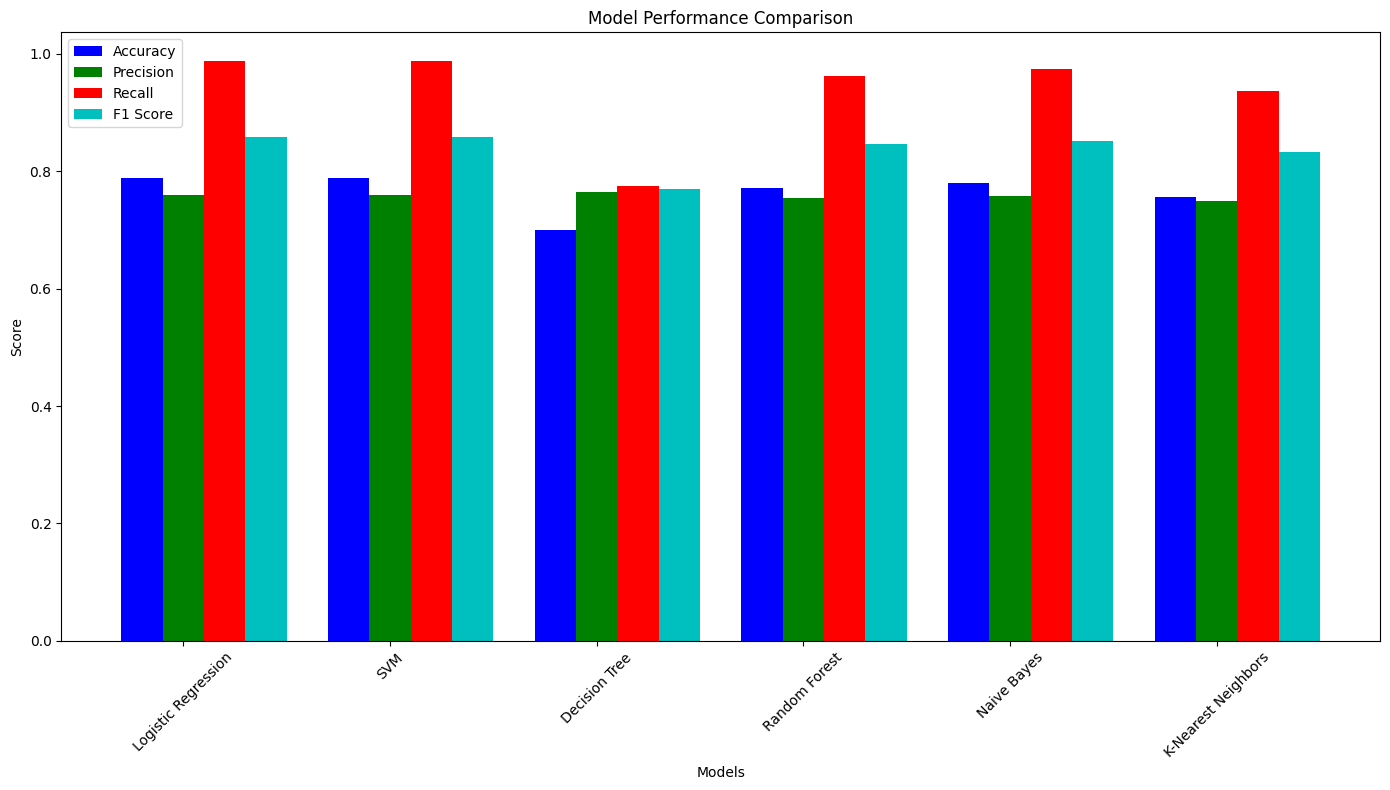

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their respective metrics from the dictionaries
models = list(accuracy_dict.keys())
accuracy = list(accuracy_dict.values())
precision = list(precision_dict.values())
recall = list(recall_dict.values())
f1_score = list(f1_score_dict.values())

# Set width of bar
bar_width = 0.2
index = np.arange(len(models))

# Create bar plots for each metric
plt.figure(figsize=(14, 8))

plt.bar(index, accuracy, bar_width, label='Accuracy', color='b')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='g')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='r')
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score', color='c')

# Labeling the plot
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()



###Model Selection

Based on these metrics, Logistic Regression or SVM would be the best-performing models due to their high accuracy (0.79), precision, recall, and F1 scores (0.86). We will proceed with Logistic Regression as the final model, as it provides good interpretability and similar performance to SVM with potentially less computational cost.

In [10]:
# Save the selected model - Logistic Regression
import joblib

best_model = LogisticRegression()
best_model.fit(X_train, y_train)

# Save the model using joblib
joblib.dump(best_model, 'best_loan_approval_model.pkl')
print("Best model saved as 'best_loan_approval_model.pkl'.")

Best model saved as 'best_loan_approval_model.pkl'.
